# $$SpeedUp$$

### Diaz Moreno Rodrigo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1- Encontrar el valor atípico y explicar por qué se considera un valor extraño.

Al graficar los distintos valores podemos observar como el punto de $1$ procesador con un tiempo de $29,278 s$, se aleja de los demas puntos. Pudiento asi concluir que es un valor atípico.

In [2]:
df=pd.read_csv("data.csv")
df.head()

,Procesadores,Time [s]
0,1,29278
1,16,178
2,25,78
3,64,16
4,256,2


Text(0.5, 1.0, 'Numero de procesadores vs Tiempo')

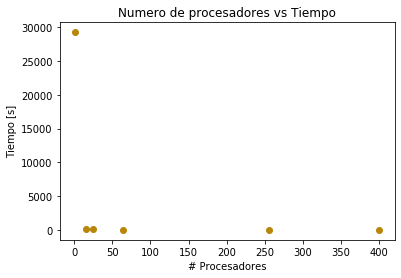

In [3]:
plt.scatter(df["Procesadores"], df["Time [s]"],c="darkgoldenrod")
plt.xlabel("# Procesadores")
plt.ylabel("Tiempo [s]")
plt.title("Numero de procesadores vs Tiempo")

## 2- Crear un archivo de esos datos en el formato CSV y leerlo en un Dataframe de Pandas.

In [4]:
df.head()

,Procesadores,Time [s]
0,1,29278
1,16,178
2,25,78
3,64,16
4,256,2


## 3- Completar las columnas de Speeup, Efficiency y Cost usando las fórmulas mostradas en la diapositiva 6, tanto para el caso absoluto como para el caso relativo con p' = 16. Agregar estos datos al dataframe antes creado y realizar los gráficos correspondientes usando Matplotlib.

In [5]:
def aceleracion(t1,tp):
    return np.round(t1/tp,3)
def eficiencia (Sp,P):
    return Sp/P
def costo (P,tp):
    return P*tp
def aceleracionRelativa(tp_prima, tp):
    return tp_prima/tp
def eficienciaRelativa (p_prima, Sp_prima, P):
    return p_prima*(Sp_prima/P)

In [6]:
#Datos Iniciales
t1=df["Time [s]"][0]
p_prima=16
tp_prima=df["Time [s]"][1]

#Calculamos las distintas columnas
df["Sp"]= aceleracion(t1,df["Time [s]"])
df["Eff"]=eficiencia(df["Sp"], df["Procesadores"])
df["Cp"]=costo(df["Procesadores"], df["Time [s]"])

df["Sp_r"]= aceleracionRelativa(tp_prima,df["Time [s]"])
df["Eff_r"]=eficienciaRelativa(p_prima,df["Sp_r"], df["Procesadores"])
df

,Procesadores,Time [s],Sp,Eff,Cp,Sp_r,Eff_r
0,1,29278,1.000,1.000000,29278,0.006080,0.097274
1,16,178,164.483,10.280188,2848,1.000000,1.000000
2,25,78,375.359,15.014360,1950,2.282051,1.460513
3,64,16,1829.875,28.591797,1024,11.125000,2.781250
4,256,2,14639.000,57.183594,512,89.000000,5.562500
5,400,1,29278.000,73.195000,400,178.000000,7.120000


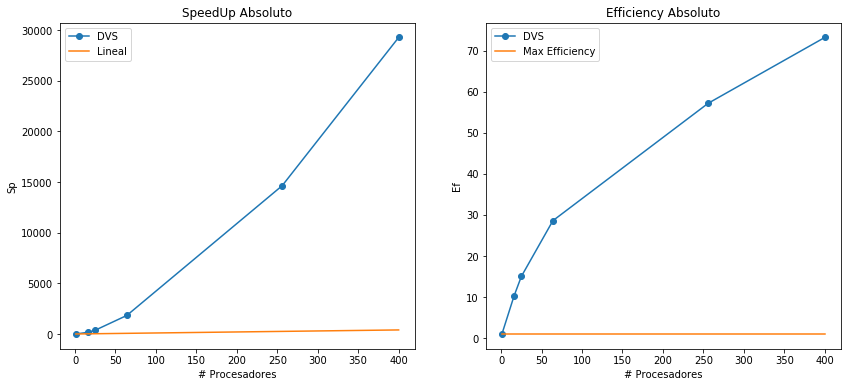

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

axes[0].plot(df["Procesadores"],df["Sp"],"o-",label="DVS")
axes[0].plot(df["Procesadores"],df["Procesadores"],label="Lineal")
axes[0].set(xlabel="# Procesadores", ylabel="Sp",title="SpeedUp Absoluto")

axes[1].plot(df["Procesadores"],df["Eff"],"o-",label="DVS")
axes[1].plot(df["Procesadores"],[1,1,1,1,1,1],label="Max Efficiency")
axes[1].set(xlabel="# Procesadores", ylabel="Ef",title="Efficiency Absoluto")

axes[0].legend()
axes[1].legend()
plt.show()

El objetivo de estas graficas es determinar que tan eficiente se vuelve nuestro algortimo en funcion de la cantidad de procesadores, queriendo saber si realmente se consigue una mejora significativa en el aumento de los procesadores, ya que puede ser el caso de que no mejore o sea despreciable el tiempo de ejecucion. Aunque parezca que la grafica nos esta diciendo que el aumento de procesadores baja considerablemente el tiempo de ejecucion y que deberiamos de aumentar los procesadores lo mas que se pueda, no tiene sentido. Esto es porque  la eficiencia toma valores de $\frac{1}{n} \leq E(n) \leq 1$. Lo que podemos concluir es que el valor atipico nos esta afectando en nuestro analisis 

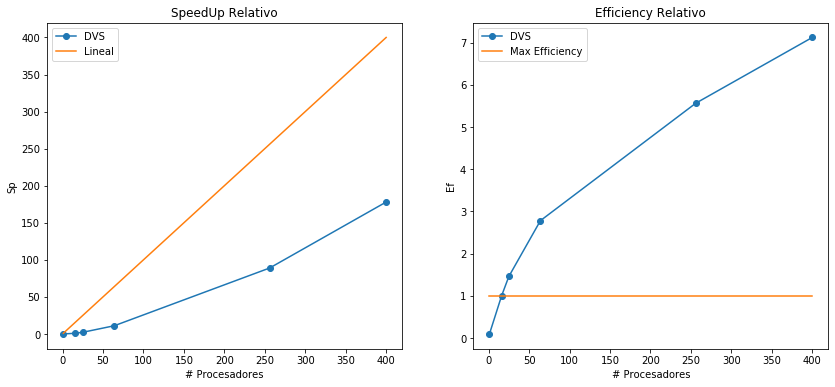

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

axes[0].plot(df["Procesadores"],df["Sp_r"],"o-",label="DVS")
axes[0].plot(df["Procesadores"],df["Procesadores"],label="Lineal")
axes[0].set(xlabel="# Procesadores", ylabel="Sp",title="SpeedUp Relativo")

axes[1].plot(df["Procesadores"],df["Eff_r"],"o-",label="DVS")
axes[1].plot(df["Procesadores"],[1,1,1,1,1,1],label="Max Efficiency")
axes[1].set(xlabel="# Procesadores", ylabel="Ef",title="Efficiency Relativo")

axes[0].legend()
axes[1].legend()
plt.show()

Podemos observar que las graficas tienen mas sentido aunque en el caso de la eficiencia nos sigue dando problemas

## 4- Generar información similar al punto 2, sustituyendo el valor atípico por el valor mostrado en la transparencia 9.  Agregar estos datos al dataframe antes creado y realizar los gráficos correspondientes usando Matplotlib.

In [10]:
#Sustituimos el valor atipico
df2=df.copy()
df2.loc[0,"Time [s]"]=430
df2.head()


,Procesadores,Time [s],Sp,Eff,Cp,Sp_r,Eff_r
0,1,430,1.000,1.000000,29278,0.006080,0.097274
1,16,178,164.483,10.280188,2848,1.000000,1.000000
2,25,78,375.359,15.014360,1950,2.282051,1.460513
3,64,16,1829.875,28.591797,1024,11.125000,2.781250
4,256,2,14639.000,57.183594,512,89.000000,5.562500


In [19]:
#Datos Iniciales
t1=df2["Time [s]"][0]
p_prima=16
tp_prima=df2["Time [s]"][1]

#Calculamos las distintas columnas
df2["Sp"]= aceleracion(t1,df2["Time [s]"])
df2["Eff"]=eficiencia(df2["Sp"], df2["Procesadores"])
df2["Cp"]=costo(df2["Procesadores"], df2["Time [s]"])

df2.head()

,Procesadores,Time [s],Sp,Eff,Cp,Sp_r,Eff_r
0,1,430,1.000,1.000000,430,0.006080,0.097274
1,16,178,2.416,0.151000,2848,1.000000,1.000000
2,25,78,5.513,0.220520,1950,2.282051,1.460513
3,64,16,26.875,0.419922,1024,11.125000,2.781250
4,256,2,215.000,0.839844,512,89.000000,5.562500
5,400,1,430.000,1.075000,400,178.000000,7.120000


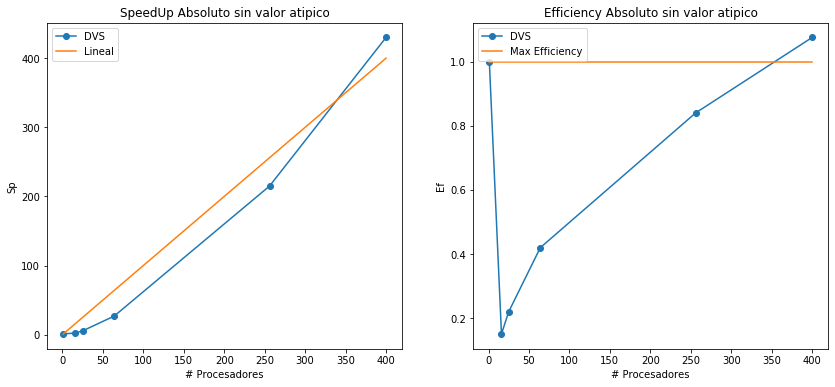

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

axes[0].plot(df2["Procesadores"],df2["Sp"],"o-",label="DVS")
axes[0].plot(df2["Procesadores"],df2["Procesadores"],label="Lineal")
axes[0].set(xlabel="# Procesadores", ylabel="Sp",title="SpeedUp Absoluto sin valor atipico")

axes[1].plot(df2["Procesadores"],df2["Eff"],"o-",label="DVS")
axes[1].plot(df2["Procesadores"],[1,1,1,1,1,1],label="Max Efficiency")
axes[1].set(xlabel="# Procesadores", ylabel="Ef",title="Efficiency Absoluto sin valor atipico")

axes[0].legend()
axes[1].legend()
plt.show()

Al sustituir el valor atipico, nos muestra ya verdaderamente como es la eficiencia y el speed up. Solo en el caso de la eficiencia al final llega a superar al valor maximo. Con estas graficas ya podemos sacar conclusiones con una mayor confianza que al principio.

Con este ejemplo podemos concluir 2 cosas:

1- La importancia de graficar los datos, ya que eso facilita a entender la informacion y nos permite observar comportamientos atipicos, que muy dificilmente se pueden observar en una tabla con muchos datos

2- Lo facil que puede ser obtener conclusiones erroneas cuando nuestro conjunto de datos presenta valores atipicos que muy probablemente sean erroneos. Con esto en mente, siempre hay que verificar que los datos tengan sentido, como lo hicimos al graficar con respecto a los valores maximos de la eficiencia.